'\n綺麗に線形回帰にデータが乗っている\n'

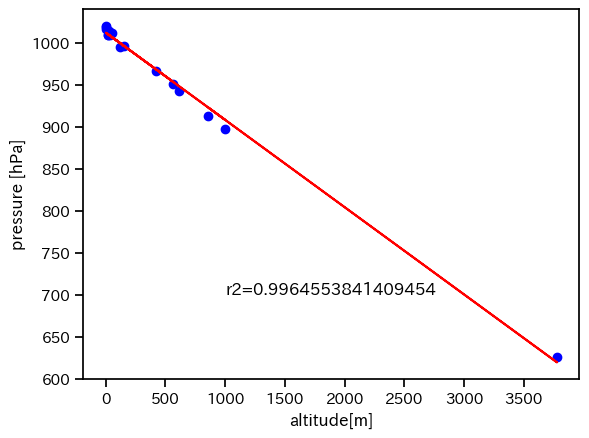

In [144]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import japanize_matplotlib
%matplotlib inline

#データ
df_temp = pd.read_csv('csv/temp_pressure.csv')

#学習
lr = LinearRegression()
X = df_temp[['altitude']].values # 標高データ
y = df_temp[['pressure']].values # 気圧データ
lr.fit(X, y)

#可視化
plt.scatter(X, y, color='b')
plt.plot(X, lr.predict(X), color='r')
plt.xlabel('altitude[m]')
plt.ylabel('pressure [hPa]')
plt.text(1000, 700, f'r2={r2_score(y, lr.predict(X))}') #決定係数

"""
綺麗に線形回帰にデータが乗っている
"""

## 多次元の説明変数

In [145]:
"""
説明変数 = 標高(altitude)
目的変数 = 気温(tempature)
だとどうなるのか？？
"""

'\n説明変数 = 標高(altitude)\n目的変数 = 気温(tempature)\nだとどうなるのか？？\n'

'\nうまく線形回帰できていない\n説明変数を標高ではなく緯度で処理してみると\n'

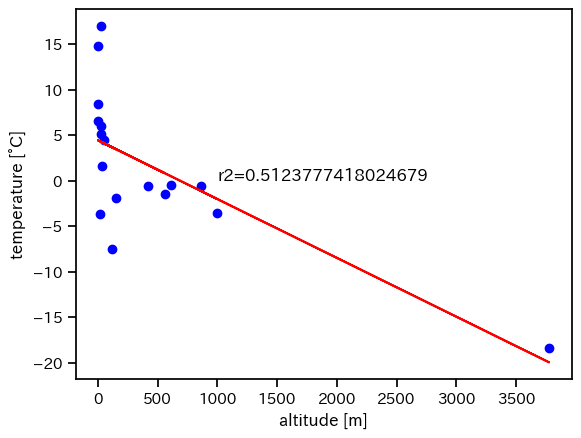

In [146]:
X = df_temp[['altitude']].values  # 説明変数(標高)
y = df_temp[['temperature']].values  # 目的変数(気温)
lr.fit(X, y)
plt.scatter(X, y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('altitude [m]')
plt.ylabel('temperature [°C]')
plt.text(1000, 0, f'r2={r2_score(y, lr.predict(X))}') 

"""
うまく線形回帰できていない
説明変数を標高ではなく緯度で処理してみると
"""

'\n北緯36度くらいのデータの精度がイマイチ（日本アルプスのように標高の高い地域が多いため）\n次に精度を確かめてみる\n'

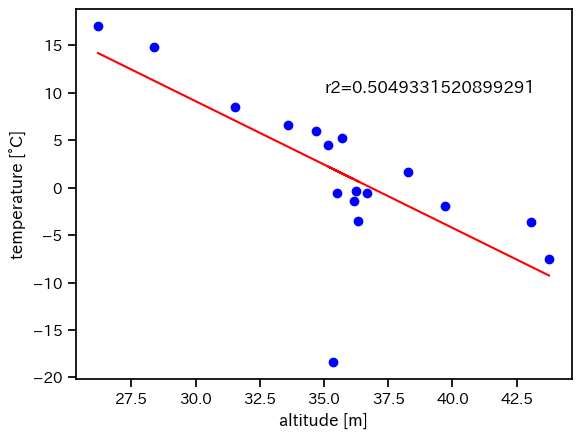

In [147]:
X = df_temp[['latitude']].values  # 説明変数(緯度)
y = df_temp[['temperature']].values  # 目的変数(気温)
lr.fit(X, y)
plt.scatter(X, y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')
plt.xlabel('altitude [m]')
plt.ylabel('temperature [°C]')
plt.text(35, 10, f'r2={r2_score(y, lr.predict(X))}') 

"""
北緯36度くらいのデータの精度がイマイチ（日本アルプスのように標高の高い地域が多いため）
次に精度を確かめてみる
"""

'\n精度が良ければ線形回帰に乗っているが、外れているデータがある。\n次に"標高", "緯度","気温"の2つの説明変数を使うと精度が上がるのでは？\n\n'

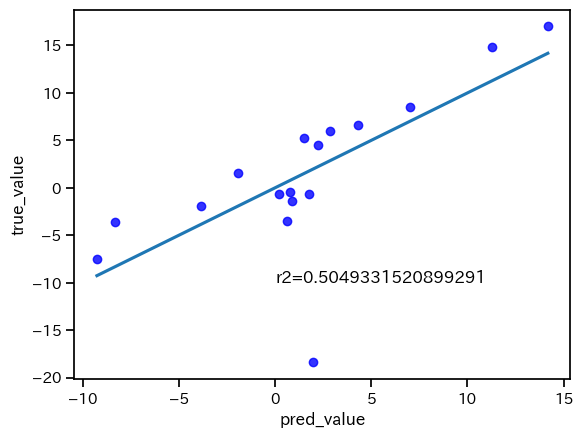

In [148]:
import seaborn as sns

#予測値と目的変数のプロット
sns.regplot(x=lr.predict(X), y=y, ci=0, scatter_kws={'color':'blue'})
plt.xlabel('pred_value')  # 予測値
plt.ylabel('true_value')  # 実測値
plt.text(0, -10, f'r2={r2_score(y, lr.predict(X))}')  # R2乗値を表示

"""
精度が良ければ線形回帰に乗っているが、外れているデータがある。
次に"標高", "緯度","気温"の2つの説明変数を使うと精度が上がるのでは？

"""


Text(0.5, 0, 'temperature[℃]')

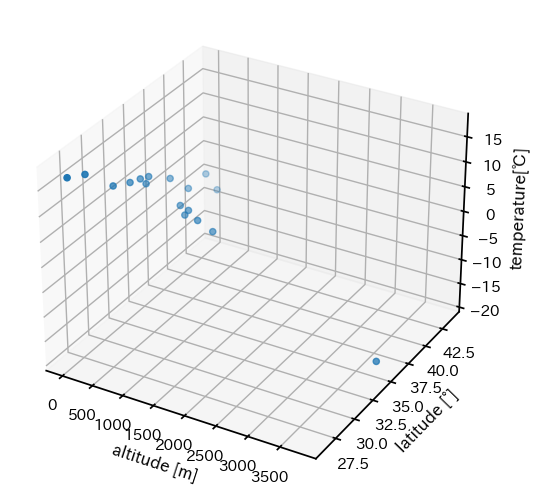

In [150]:
from mpl_toolkits.mplot3d import Axes3D

#説明変数、目的変数
X = df_temp[['altitude', 'latitude']]
y = df_temp['temperature']

fig = plt.figure()
ax = Axes3D(fig,  auto_add_to_figure=False)
fig.add_axes(ax)

#x軸、y軸、z軸
ax.scatter3D(X['altitude'], X['latitude'], y)
ax.set_xlabel('altitude [m]')
ax.set_ylabel('latitude [°]')
ax.set_zlabel('temperature[℃]')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, -10, 'r2=0.9882146530719522')

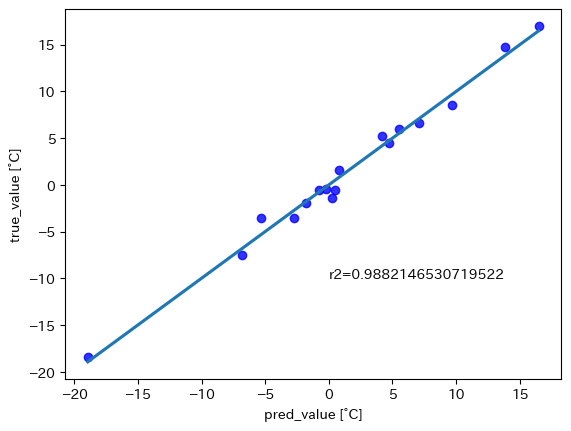

In [17]:
lr.fit(X, y) #Xは'altitude', 'latitude'の2特徴量
sns.regplot(lr.predict(X), y, ci=0, scatter_kws={'color':'blue'})
plt.xlabel('pred_value [°C]')
plt.ylabel('true_value [°C]')
plt.text(0, -10, f'r2={r2_score(y, lr.predict(X))}')

"""
多次元の説明変数で予想精度が向上した。
※可視化難易度や次元の呪いは気を付ける

"""

## 非線形

In [18]:
df_animal = pd.read_csv('csv/animal_size.csv')

In [20]:
df_animal.head()

,name,body_length,weight
0,Mara,72,12
1,Lion,210,200
2,Hyena,150,70
3,Eland,295,650
4,Wolf,115,35


Text(0, 0.5, 'weight [kg]')

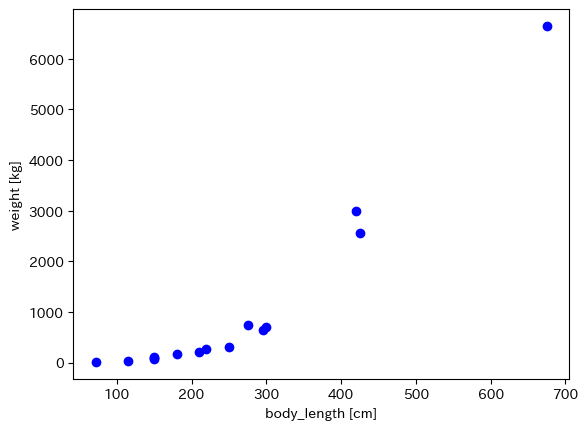

In [75]:
X = df_animal[['body_length']].values
y = df_animal[['weight']].values

#散布図
plt.scatter(X, y, color='b')
plt.xlabel('body_length [cm]')
plt.ylabel('weight [kg]')

In [76]:
#外れ値？
df_animal[df_animal['body_length'] > 400 ].sort_values(by='weight').iloc[0, :]

name           Rhinoceros
body_length           425
weight               2550
Name: 11, dtype: object

'\n線形で無理やり回帰しているので、イマイチなフィッティング\n\n体重(体積)は体長の3乗に比例するので3次式で回帰すれば良い？\n\n多項式回帰の方法には、scikit-learnを使う方法や、scipy.optimizeを使う方法があるが、\n今回は3乗以外の係数を無視するのでscipy.optimizeを使用\n\n'

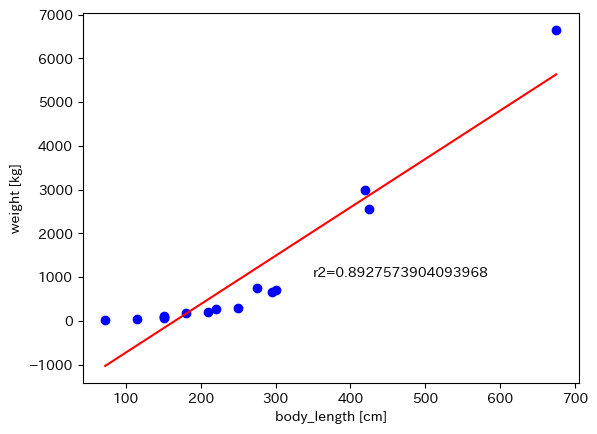

In [87]:
df_animal = df_animal[df_animal['name'] != 'Giraffe'] #キリン除外
df_animal = df_animal.sort_values('body_length')

#学習
X = df_animal[['body_length']].values
y = df_animal[['weight']].values
lr.fit(X, y)

#可視化
plt.scatter(X, y, color='b')
plt.plot(X, lr.predict(X), color='r')
plt.xlabel('body_length [cm]')
plt.ylabel('weight [kg]')
plt.text(350, 1000, f'r2={r2_score(y, lr.predict(X))}') 

"""
線形で無理やり回帰しているので、イマイチなフィッティング

体重(体積)は体長の3乗に比例するので3次式で回帰すれば良い？

多項式回帰の方法には、scikit-learnを使う方法や、scipy.optimizeを使う方法があるが、
今回は3乗以外の係数を無視するのでscipy.optimizeを使用

"""

Text(400, 1000, 'r2=0.9436403153398104')

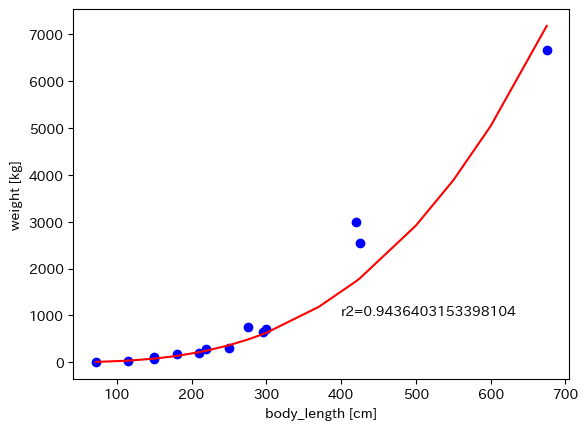

In [96]:
from scipy.optimize import curve_fit

def cubic_fit(x, a):
    Y = a * x **3
    return Y

#パラメータの推定
#popt:最適なパラメータ値(a値)
#pcov:パラメータの共分散
popt, pcov = curve_fit(cubic_fit, X[:, 0], y[:, 0])

#データの散布図
plt.scatter(X, y, color = 'b')

pred_y = cubic_fit(X, popt[0]) #予測値
X_add = np.sort(np.vstack((X, np.array([[370], [500], [550], [600]]))), axis=0) # 線形が滑らかになるように
pred_y_add = cubic_fit(X_add, popt[0])

plt.plot(X_add, pred_y_add, color = 'r')
plt.xlabel('body_length [cm]')  # x軸のラベル
plt.ylabel('weight [kg]')  # y軸のラベル
plt.text(400, 1000, f'r2={r2_score(y, pred_y)}')  # R2乗値を表示


"""
3次式で非線形回帰にしたことで、推定性能が向上
今回、物理法則に基づいて3次式にしたが、実際はわからない

機械学習アルゴリズムは非線形のフィッティングを「実データに合わせて」、「柔軟に」実現してくれる。
 ->SVMのカーネルトリック
 https://qiita.com/c60evaporator/items/8864f7c1384a3c6e9bd9#%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E3%83%88%E3%83%AA%E3%83%83%E3%82%AF%E3%81%A8%E3%81%AF

"""

## 3.1 サポートベクターマシン分類

In [ ]:
"""
SVM
多クラス分類
KFold
"""

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

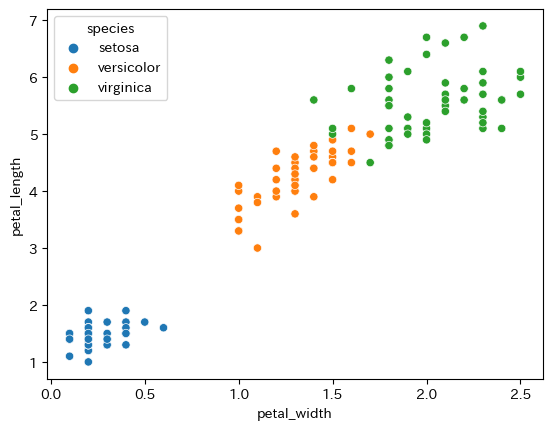

In [101]:
iris = sns.load_dataset('iris')
sns.scatterplot(x= 'petal_width', y='petal_length', data=iris, hue='species')

In [181]:
from seaborn_analyzer import classplot
from sklearn.svm import SVC
from sklearn.model_selection import KFold

#モデル(チューニング前)
model = SVC() 
seed = 42

#3分割KFoldクロスバリデーション
cv = KFold(n_splits=3, shuffle=True, random_state=seed)

# classplot.class_separator_plot(model, ['petal_width', 'petal_length'], 'species', pre_iris, cv=cv, display_cv_indices=[0, 1, 2])

"""
matplotlibのバージョン問題？？

"""

'\nmatplotlibのバージョン問題？？\n\n'

In [158]:
pre_iris.dtypes

sepal_length     int64
sepal_width      int64
petal_length     int64
petal_width      int64
species         object
dtype: object

In [ ]:
#手順1 最大化したい評価指標の定義
"""
・多クラス分類
・不均衡データではない
->f1-macroを評価指標にする

"""

In [168]:
#チューニング前
from sklearn.model_selection import cross_val_score
import numpy as np

X = iris[['petal_width', 'petal_length']].values 
y = iris['species']
scoring = 'f1_macro'

scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
print(f'scores={scores}')
print(f'average_score={np.mean(scores)}')

scores=[1.         0.91633987 0.96393762]
average_score=0.9600924970378014


In [169]:
#gamma値の計算(デフォルの場合)　svmのページ参照
print(f'gamma = {1 /(X.shape[1] * X.var())}')

gamma = 0.14396727220794353


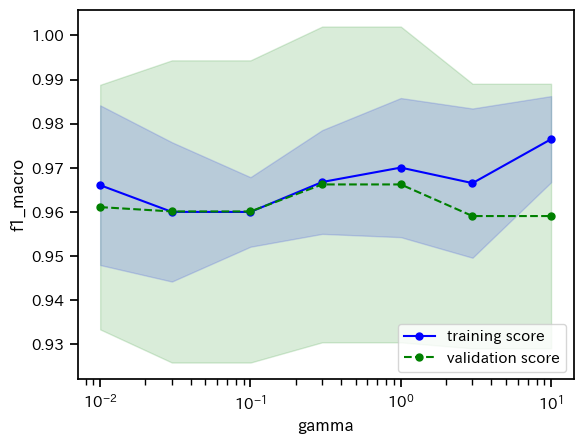

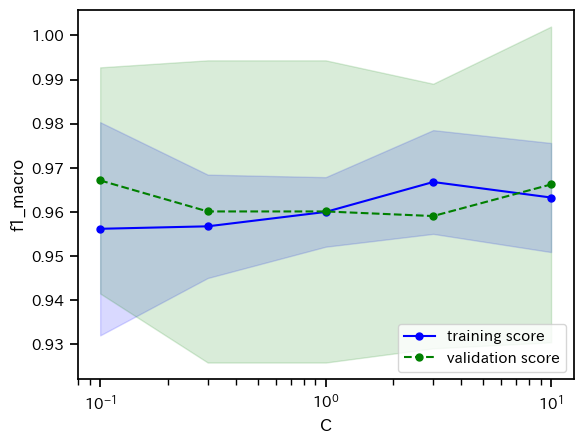

In [185]:
#パラメータ種類と範囲の選択
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline

cv_params = {'gamma':[0.01, 0.03, 0.1, 0.3, 1, 3, 10],
            'C': [0.1, 0.3, 1, 3, 10]}

for i, (k,v) in enumerate(cv_params.items()):
    
    #検証曲線
    train_scores, valid_scores = validation_curve(estimator=model, X=X, y=y, param_name=k, param_range=v, cv=cv, scoring=scoring, n_jobs=-1)
    
    
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    
     # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()
    
    """
    もっと細かくパラメータを設定
    
    """

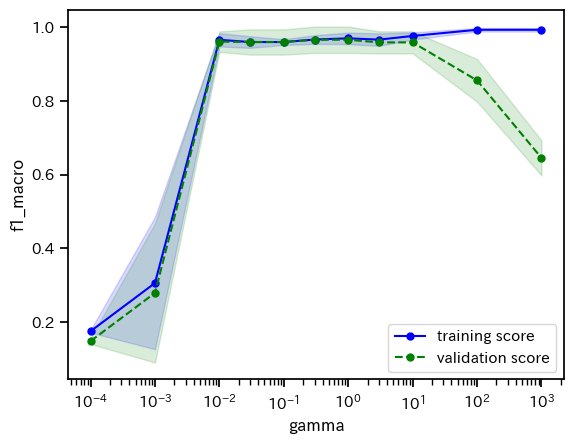

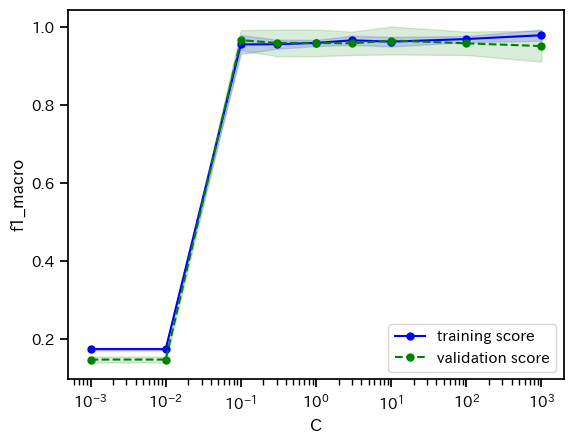

In [186]:
cv_params = {'gamma': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100, 1000],
             'C': [0.001, 0.01, 0.1, 0.3, 1, 3, 10, 100, 1000]}
# 検証曲線のプロット（パラメータ毎にプロット）
for i, (k, v) in enumerate(cv_params.items()):
    train_scores, valid_scores = validation_curve(estimator=model,
                                                  X=X, y=y,
                                                  param_name=k,
                                                  param_range=v,
                                                  cv=cv, scoring=scoring,
                                                  n_jobs=-1)
    # 学習データに対するスコアの平均±標準偏差を算出
    train_mean = np.mean(train_scores, axis=1)
    train_std  = np.std(train_scores, axis=1)
    train_center = train_mean
    train_high = train_mean + train_std
    train_low = train_mean - train_std
    # テストデータに対するスコアの平均±標準偏差を算出
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std  = np.std(valid_scores, axis=1)
    valid_center = valid_mean
    valid_high = valid_mean + valid_std
    valid_low = valid_mean - valid_std
    # training_scoresをプロット
    plt.plot(v, train_center, color='blue', marker='o', markersize=5, label='training score')
    plt.fill_between(v, train_high, train_low, alpha=0.15, color='blue')
    # validation_scoresをプロット
    plt.plot(v, valid_center, color='green', linestyle='--', marker='o', markersize=5, label='validation score')
    plt.fill_between(v, valid_high, valid_low, alpha=0.15, color='green')
    # スケールを'log'に（線形なパラメータは'linear'にするので注意）
    plt.xscale('log')
    # 軸ラベルおよび凡例の指定
    plt.xlabel(k)  # パラメータ名を横軸ラベルに
    plt.ylabel(scoring)  # スコア名を縦軸ラベルに
    plt.legend(loc='lower right')  # 凡例
    # グラフを描画
    plt.show()

"""
調整範囲
パラメータ"gamma"：0.001～100
パラメータ"C"：0.01～100

"""

In [188]:
valid_scores

array([[0.15384615, 0.15384615, 0.13756614],
       [0.15384615, 0.15384615, 0.13756614],
       [1.        , 0.93743891, 0.96393762],
       [1.        , 0.91633987, 0.96393762],
       [1.        , 0.91633987, 0.96393762],
       [0.97849462, 0.91666667, 0.98198198],
       [1.        , 0.91666667, 0.98198198],
       [0.97849462, 0.91666667, 0.98198198],
       [0.97849462, 0.89556088, 0.98198198]])